1 задача

In [3]:
import numpy as np

a = np.random.random((10, 3))
print(a)
b = np.argmin(abs(a-0.5), axis=1)

c = np.arange(10)

print(a[c,b])

[[0.17965278 0.8860593  0.42526642]
 [0.41003377 0.16728604 0.15616582]
 [0.37554019 0.32321596 0.51445698]
 [0.09508757 0.33825194 0.06735058]
 [0.86153642 0.64410541 0.7767233 ]
 [0.43785114 0.25359454 0.62193827]
 [0.11703587 0.05600964 0.23601033]
 [0.6670091  0.45914016 0.25673582]
 [0.86279619 0.40013967 0.15073581]
 [0.64231419 0.53341244 0.09290883]]
[0.42526642 0.41003377 0.51445698 0.33825194 0.64410541 0.43785114
 0.23601033 0.45914016 0.40013967 0.53341244]


2 задача

In [12]:
a = np.random.random((6,6))
print(a)
b = np.argmin(a, axis = 0)
c = np.arange(6)

print(sum(a[c])/a[b[c],c])

[[0.35111962 0.26815581 0.81660443 0.78614447 0.708533   0.03913765]
 [0.6114329  0.79379034 0.66311475 0.59649881 0.32719407 0.9783646 ]
 [0.84508023 0.74468894 0.95722959 0.63724244 0.85189521 0.63799118]
 [0.26540522 0.71916693 0.18218282 0.87049611 0.08201882 0.23830731]
 [0.29935702 0.54323561 0.83794351 0.47768765 0.13404608 0.83402799]
 [0.84037845 0.48857528 0.98609424 0.27468948 0.91466068 0.6429922 ]]
[3 0 3 5 3 0]
[12.10516288 13.26696181 24.38852028 13.26137043 36.80067217 86.12731662]


3 задача

In [44]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

c = np.arange(len (x))
mask = x == 0

print(np.max( x[ mask[(c+1) % len(x)] ] ) )


7


4 задача

In [65]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength=len(x))
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5 задача

In [405]:
def get_labels(pts, centroids):

    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def my_kmeans(obs, k, iter=20, thresh=1e-05):
    centroids = np.random.random((k, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norm = norma(obs, centroids, labels)
    minnm = norm
    newcen = centroids
        
        
    for i in range(iter):
        prevnm = norm
        centroids = np.array([obs[labels == i].mean(axis=0) for i in range(k)])
        labels = get_labels(obs, centroids)
        norm = norma(obs, centroids, labels)       
        if norm < minnm:
            newcen = centroids
            minnm = norm
   
        if abs(norm - prevnm) < thresh:
            break
            
    return newcen

def norma(obs, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans+= abs(np.linalg.norm(obs[i==labels] - centroids[i], axis=1).sum())
    return ans


Задача 6

(Метод локтя реализовать не получилось, количество кластеров определял в ручную, методом подбора)

<ipython-input-405-e0557b4b01b4>:16: RuntimeWarning: Mean of empty slice.
  centroids = np.array([obs[labels == i].mean(axis=0) for i in range(k)])


[[27.32608696 49.36956522]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.40816327 48.04081633]]


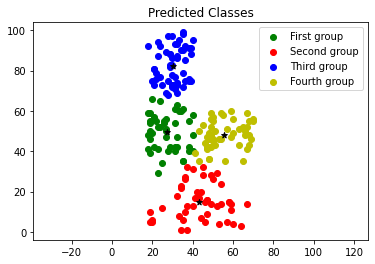

In [409]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)


b = np.empty((data.shape[0],2))



for i in range(data.shape[0]):
    b[i, 0] = float(data[i, 2])
    b[i, 1] = float(data[i, 4])

    
#print((np.take(b, (0, 1), axis = 1)))

centroids = my_kmeans(b, 4)

while (np.sum(centroids) < 3 * centroids.shape[0]):
    centroids = my_kmeans(b, 4)
    

print(centroids)

labels = get_labels(b, centroids)

#print (labels)

plt.scatter(*(b[labels == 0]).T, c = 'g', label = 'First group')
plt.scatter(*(b[labels == 1]).T, c = 'r', label = 'Second group')
plt.scatter(*(b[labels == 2]).T, c = 'b', label = 'Third group')
plt.scatter(*(b[labels == 3]).T, c = 'y', label = 'Fourth group')
plt.scatter(*centroids.T, c=['black'], marker='*')
plt.title('Predicted Classes')
plt.axis('equal')
plt.legend()
plt.show()